# Exploratory Data Analysis (EDA) - Cars Dataset

O projeto consiste em fazer uma Análise Exploratória de Dados (EDA) em um dataset de Carros de uma Concessionária. Objetivo do Projeto é extrair insights e informações valiosas para a concessionária em relação aos veículos, demonstrando manipulação, vizualização e organização de dados, tudo isso utilizando o Python e bibliotecas como Pandas, Numpy, Matplotlib, Seaborn e Plotly.

Para essa análise o Objetivo é descobrir:

- Qual o valor médio dos carros de cada marca?
- Qual a distribuição de faixa etária dos carros da concessionária?
- Qual a influência dos tipos de carro sobre o preço?
- Qual a distribuição dos tipos de transmissão nos carros da concessionária?

Dataset: https://www.kaggle.com/datasets/mustafaoz158/car-price?resource=download

## Importação dos Módulos (Libs):

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando e Vizualizando os Dados

In [277]:
df = pd.read_csv('dataset/car_price_dataset.csv')

In [278]:
display(df)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [280]:
df.shape

(10000, 10)

In [281]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

## Resumo (Estatísticas Descritivas):

In [282]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [283]:
df.describe(include=['O'])

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


## Exploratory Data Analysis (EDA):

Podemos começar analisando a distribuição da variável alvo (Price)

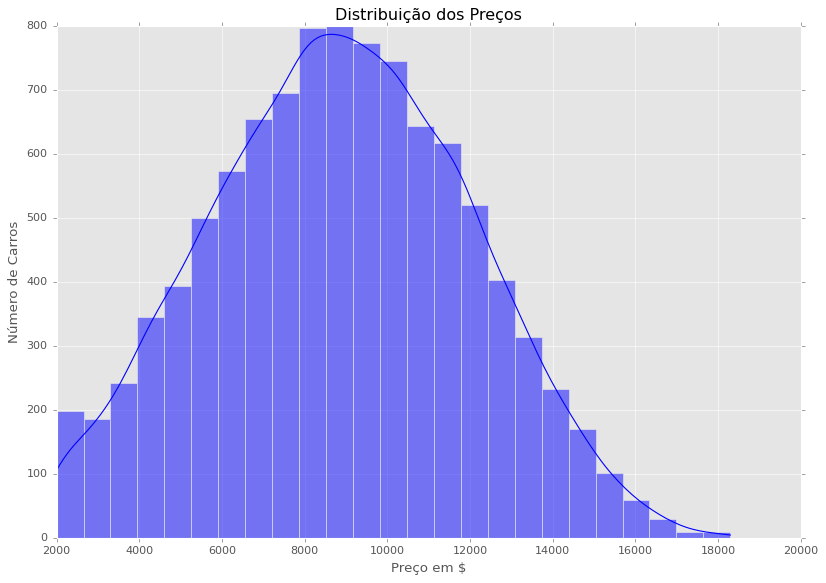

In [284]:
plt.figure(figsize=(12, 8))
sns.histplot(df.Price, bins=25, kde=True, color='blue')
plt.xlabel('Preço em $')
plt.ylabel('Número de Carros')
plt.title('Distribuição dos Preços')
plt.show()

- Podemos perceber no gráfico de distribuição dos preços que há uma predominância de carros custando entre $8.000 e $10.000 Dólares. Podemos plotar um Boxplot para vizualizar melhor a distribuição desses dados e também se há presença de Outliers na variável alvo e também nas demais variáveis.

Year              Axes(0.125,0.1;0.110714x0.8)
Engine_Size    Axes(0.257857,0.1;0.110714x0.8)
Mileage        Axes(0.390714,0.1;0.110714x0.8)
Doors          Axes(0.523571,0.1;0.110714x0.8)
Owner_Count    Axes(0.656429,0.1;0.110714x0.8)
Price          Axes(0.789286,0.1;0.110714x0.8)
dtype: object

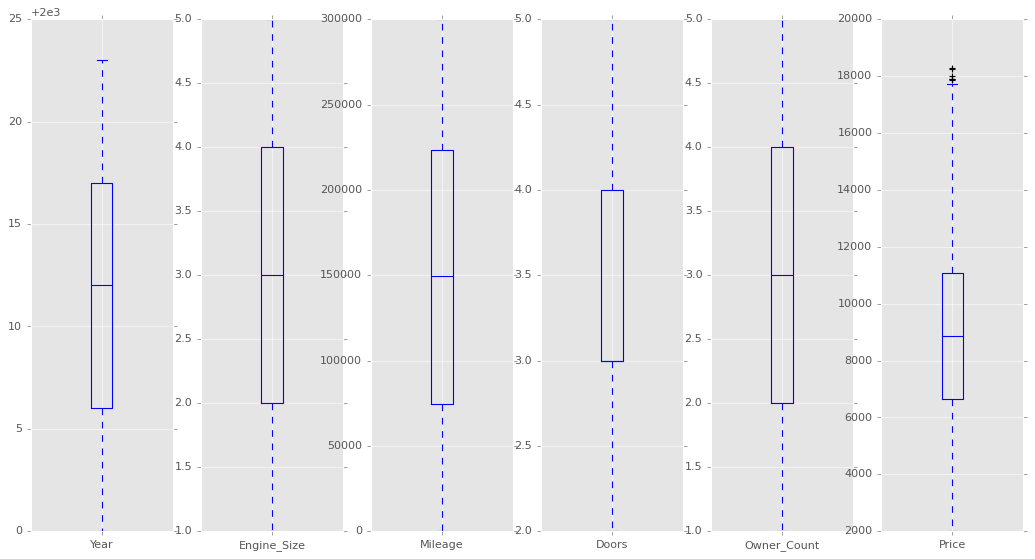

In [285]:
df.plot(kind='box', figsize=(16,8), color='blue', subplots=True)

- Podemos extrair informações muito importantes desse gráfico: Temos Outliers na variável alvo (Price). Podemos afirmar que os valores de compra acima de $17.000 dólares são Outliers. As demais variáveis não possuem Outliers.

### Qual o valor médio dos carros por cada marca?

In [286]:
df['Brand'].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

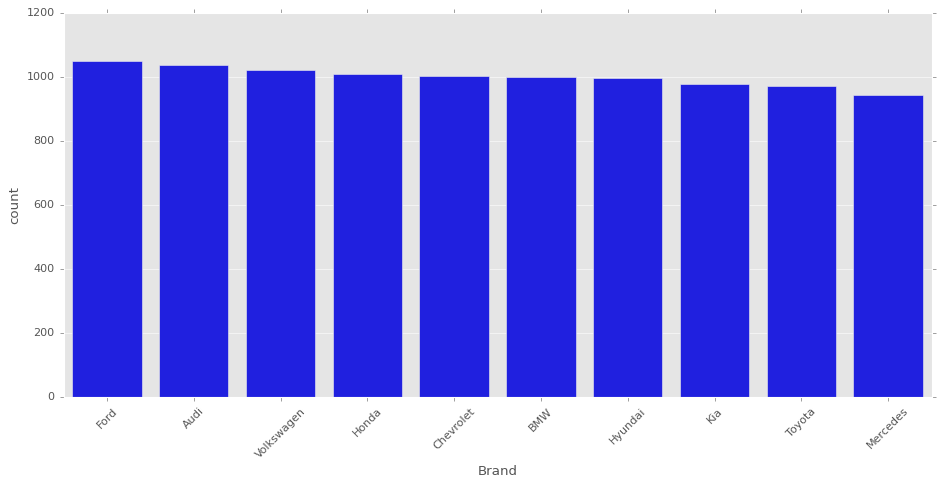

In [287]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Brand',order=df['Brand'].value_counts().index, color='blue', data=df)
plt.xticks(rotation=45)
plt.show()

In [288]:
df[['Brand', 'Price']].groupby(['Brand'], as_index = True).mean().sort_values(by='Price', ascending=False)

,Price
Brand,
Chevrolet,9015.683948
Mercedes,8980.087049
Audi,8929.373796
Volkswagen,8928.377451
Kia,8880.086066
Ford,8852.570611
Toyota,8798.184536
Hyundai,8778.279397
BMW,8704.068068


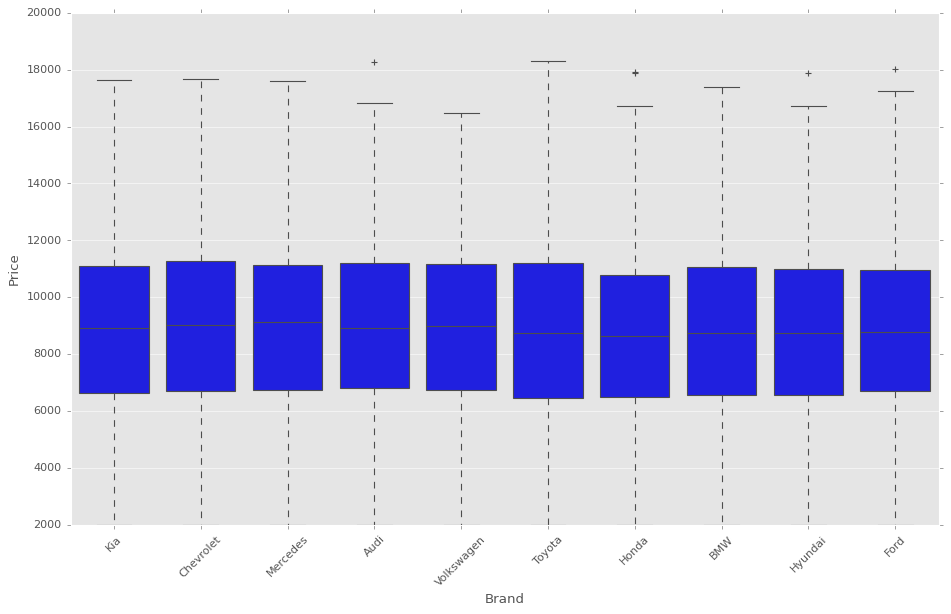

In [289]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Price', color='blue', data=df)
plt.xticks(rotation=45)
plt.show()

- Podemos observar no gráfico de barras que há uma variedade bem similar de carros por marca disponíveis para venda, porém é perceptível que a concessionária possui um número maior de carros das marcas Ford e Audi e um número menor de carros da Mercedes. Já no Boxplot vemos que o valor está bem distribuído entre as marcas, com os carros da Honda e BMW tendo uma média de valores mais acessível.

### Qual a distribuição de faixa etária dos carros da concessionária?

In [290]:
df['Year'].value_counts()

Year
2002    462
2011    449
2023    448
2012    437
2017    433
2010    431
2005    431
2007    430
2015    426
2018    425
2013    422
2019    421
2014    417
2006    415
2020    415
2001    406
2009    399
2022    397
2016    395
2004    394
2000    393
2021    391
2008    382
2003    381
Name: count, dtype: int64

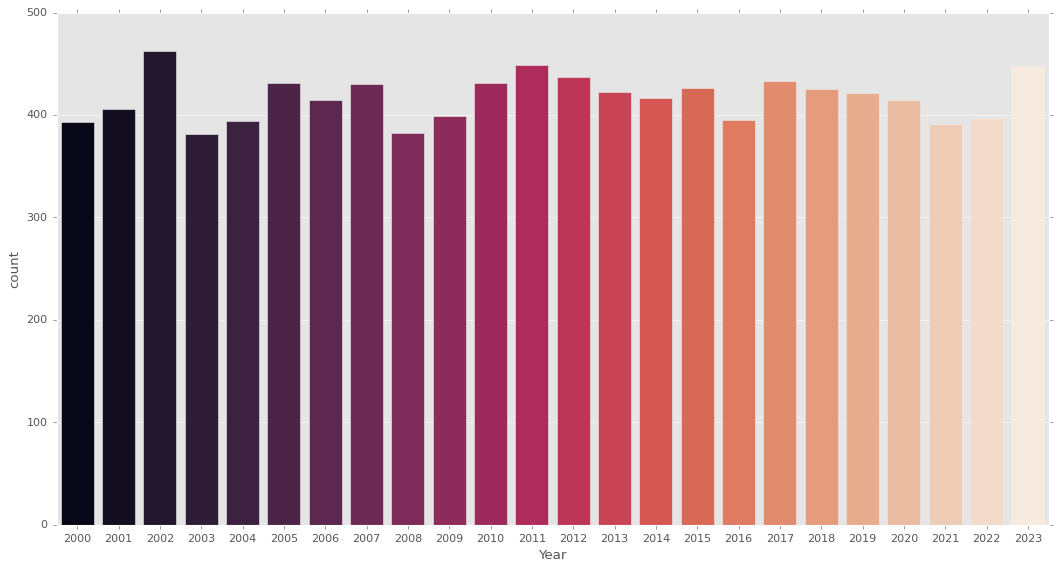

In [291]:
plt.figure(figsize=(16,8))
sns.countplot(x='Year', hue='Year', data=df, palette='rocket', legend=False)
plt.show()

In [292]:
# Feature de Faixa Etária a partir do ano de fabricação:
ano_presente = 2026
df['Car_Age'] = ano_presente - df['Year']
intervalos = [0, 2, 5, 10, 20, float('inf')]
faixas = ['1-2 Years', '3-5 Years', '6-10 Years', '11-20 Years', '>20 Years']
df['Age_Group'] = pd.cut(df['Car_Age'], bins=intervalos, labels=faixas)

In [293]:
df['Age_Group'].value_counts()

Age_Group
11-20 Years    4208
>20 Years      2467
6-10 Years     2089
3-5 Years      1236
1-2 Years         0
Name: count, dtype: int64

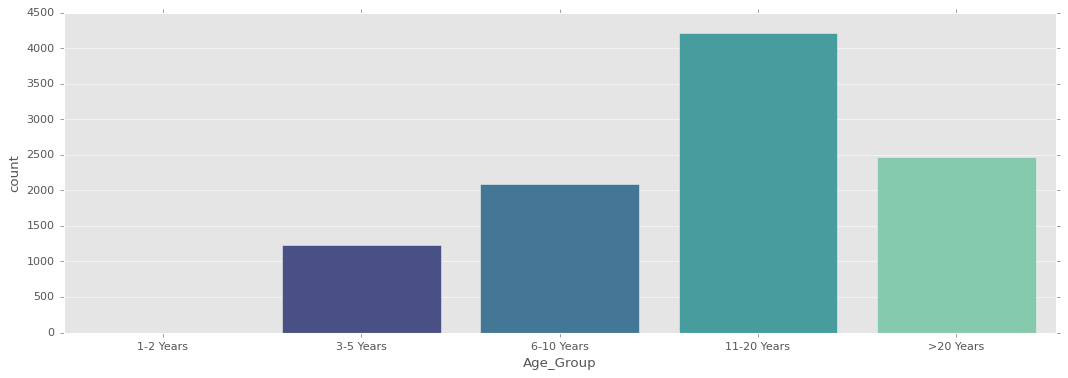

In [294]:
plt.figure(figsize=(16,5))
sns.countplot(x='Age_Group', hue='Age_Group', data=df, palette='mako', dodge=False, legend=False)
plt.show()

- Ao observarmos o primeiro gráfico de barras vemos o número de carros por cada ano (de fabricação), entretanto a vizualização mostra de 2000 até 2023, deixando a interpretação um pouco mais específica. Já no segundo gráfico de barras podemos ver o número de carros por faixa etária, o que deixa a interpretação um pouco mais fácil e mais nociva em relação ao período de tempo. Analisando o segundo gráfico, observa-se que há uma predominância de carros com mais de 10 anos de uso a venda nessa concessionária e poucos carros com menos de 5 anos de uso.

### Influência dos Tipos de Carro sobre o Preço

In [295]:
df.groupby('Fuel_Type')['Price'].agg(['mean', 'median', 'count']).sort_values('median', ascending=False)

,mean,median,count
Fuel_Type,,,
Electric,10032.220190,10051.0,2625
Hybrid,9113.030167,9110.0,2453
Petrol,8070.561826,8167.5,2410
Diesel,8117.336385,8107.0,2512


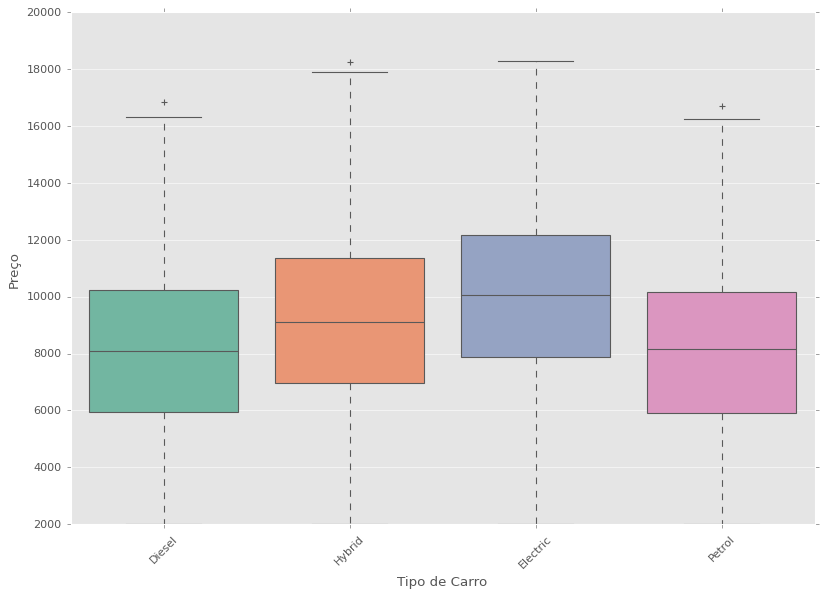

In [296]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel_Type', y='Price', hue='Fuel_Type', palette='Set2', data=df)
plt.xticks(rotation=45)
plt.xlabel('Tipo de Carro')
plt.ylabel('Preço')
plt.show()

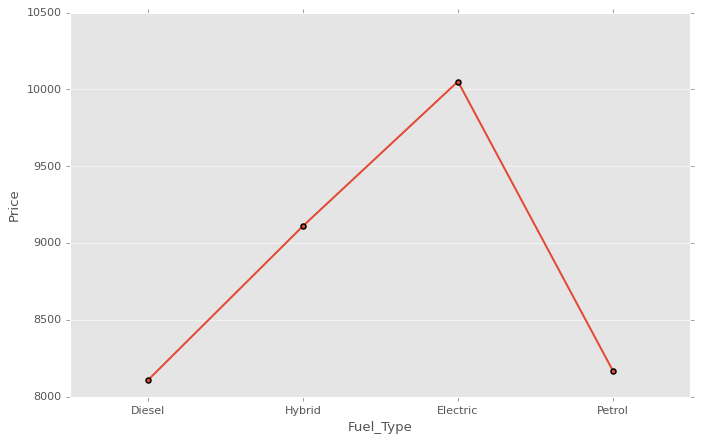

In [297]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Fuel_Type', y='Price', estimator='median', errorbar=None, data=df)
plt.show()

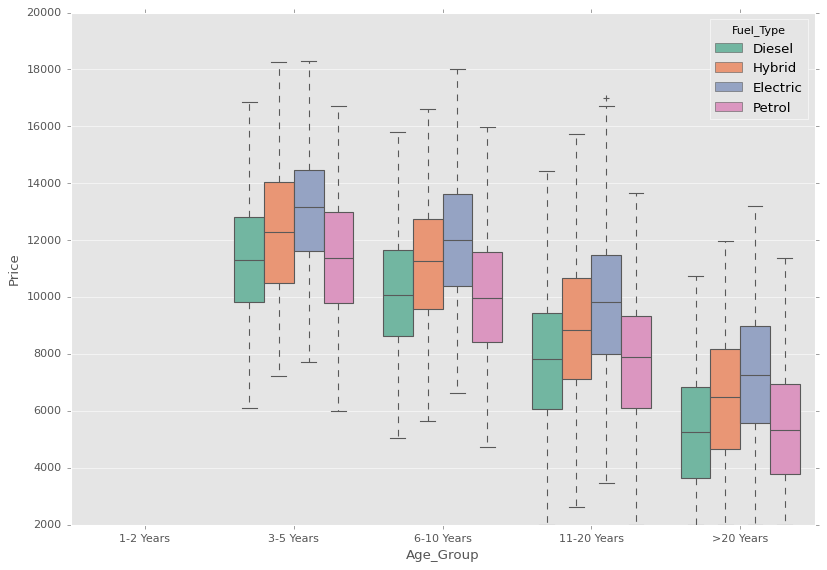

In [298]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Age_Group', y='Price', hue='Fuel_Type', palette='Set2', data=df)
plt.show()

- Quando analisamos o primeiro Boxplot podemos perceber um padrão onde a Mediana dos Carros Elétricos é significativamente maior que as demais, indicando uma forte influência dos Carros Elétricos sobre o preço, isso fica ainda mais explícito no Gráfico de Pontos abaixo do primeiro Boxplot. Já no segundo Boxplot, observa-se que o padrão se repete e os Carros Elétricos apresentam mediana de preço superior aos demais tipos, mesmo quando controlada a faixa etária, indicando que o tipo de Carro tem Influência Significativa no preço.

### Qual a Distribuição dos tipos de Transmissão dos Carros da concessionária?

In [299]:
tcounts = df['Transmission'].value_counts()
tcounts

Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64

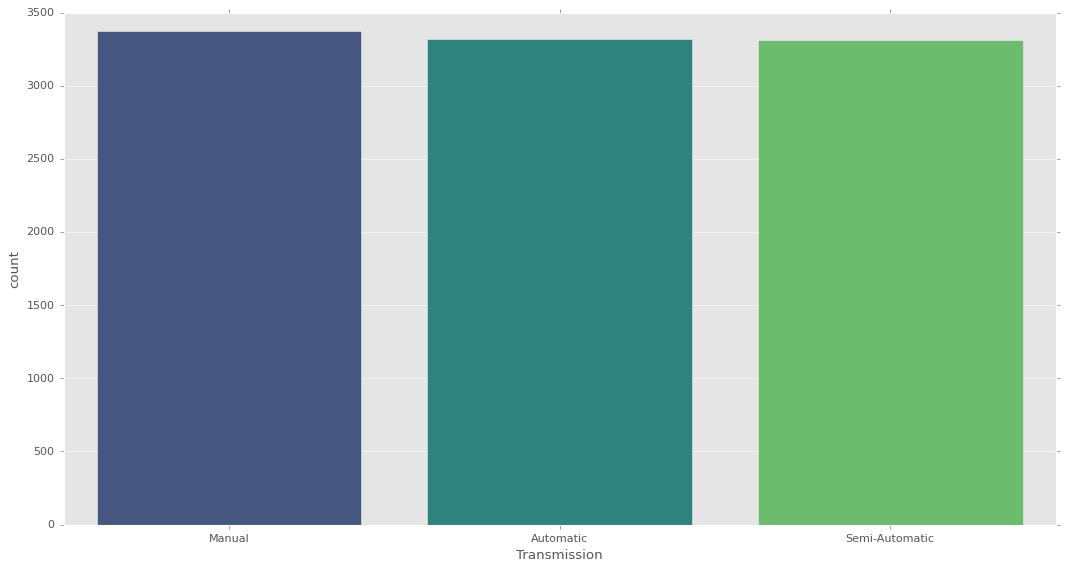

In [300]:
plt.figure(figsize=(16,8))
sns.countplot(x='Transmission', hue='Transmission', data=df, palette='viridis', legend=False)
plt.show()

In [301]:
df['Transmission'].value_counts(normalize=True) * 100

Transmission
Manual            33.72
Automatic         33.17
Semi-Automatic    33.11
Name: proportion, dtype: float64

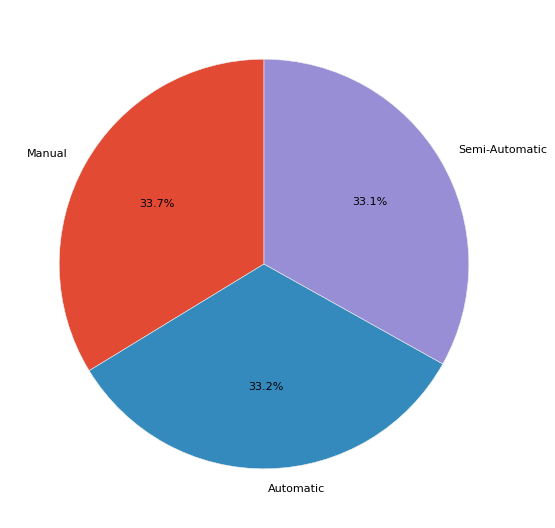

In [302]:
plt.figure(figsize=(12,8))
plt.pie(tcounts.values, labels=tcounts.index, autopct='%1.1f%%', startangle=90)
plt.show()

- Podemos ver que no gráfico de Barras acima que a distribuição dos tipos de Transmissão dos Carros está Bem Equilibrada, com uma diferença quase mínima. Essa impressão fica ainda mais clara quando analisamos o gráfico de Pizza. Claramente temos aqui um número quase igual de carros de Transmissão Manual, Automática e Semi-automática, isso mostra uma distribuição bastante equilibrada, dando a entender que a variedade de tipos de Transmissão nos carros da concessionária é Signicativa.

### (Extra) Vamos Analisar Informações sobre a Relação do Preço com outras variáveis: 

In [303]:
display(df[['Price', 'Car_Age']])

,Price,Car_Age
0,8501,6
1,12092,14
2,11171,6
3,11780,3
4,2867,23
...,...,...
9995,8884,22
9996,6240,24
9997,9866,16
9998,4084,24


In [304]:
display(df[['Price', 'Mileage']])

,Price,Mileage
0,8501,289944
1,12092,5356
2,11171,231440
3,11780,160971
4,2867,286618
...,...,...
9995,8884,5794
9996,6240,168000
9997,9866,86664
9998,4084,225772


In [305]:
display(df[['Price', 'Owner_Count']])

,Price,Owner_Count
0,8501,5
1,12092,3
2,11171,2
3,11780,1
4,2867,3
...,...,...
9995,8884,4
9996,6240,1
9997,9866,1
9998,4084,1


In [306]:
# Feature de Intervalos a partir da Quilometragem:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
intervalos_2 = [0, 1000, 5000, 10000, 50000, 100000, 200000, float('inf')]
grupos = ['<=1000 KM', '1001-5000 KM', '6000-10000 KM', '11000-50000 KM', '51000-100000 KM', '101000-199000 KM', '>200000 KM']
df['Mileage_Group'] = pd.cut(df['Mileage'], bins=intervalos_2, labels=grupos, include_lowest=True)

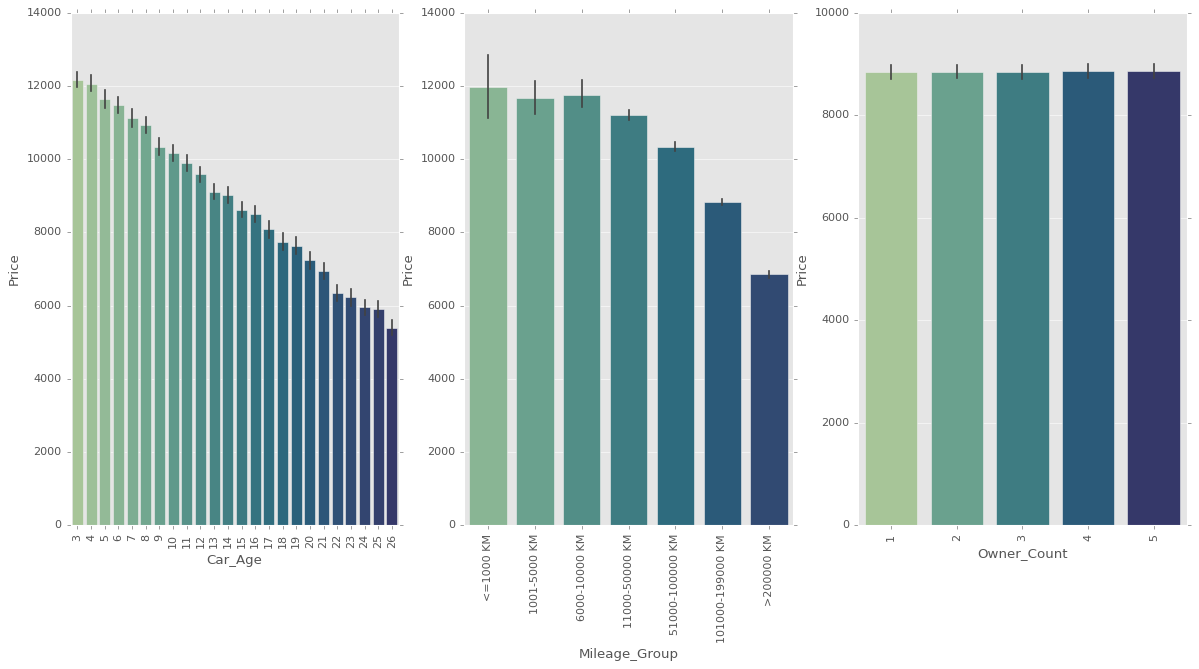

In [307]:
plt.figure(figsize=(18,8))
plt.subplot(131)
sns.barplot(x='Car_Age', y='Price', hue='Car_Age', data=df, legend=False, palette='crest')
plt.xticks(rotation=90)

plt.subplot(132)
sns.barplot(x='Mileage_Group', y='Price', hue='Mileage_Group', data=df, legend=False, palette='crest')
plt.xticks(rotation=90)

plt.subplot(133)
sns.barplot(x='Owner_Count', y='Price', hue='Owner_Count', data=df, legend=False, palette='crest')
plt.xticks(rotation=90)

plt.show()

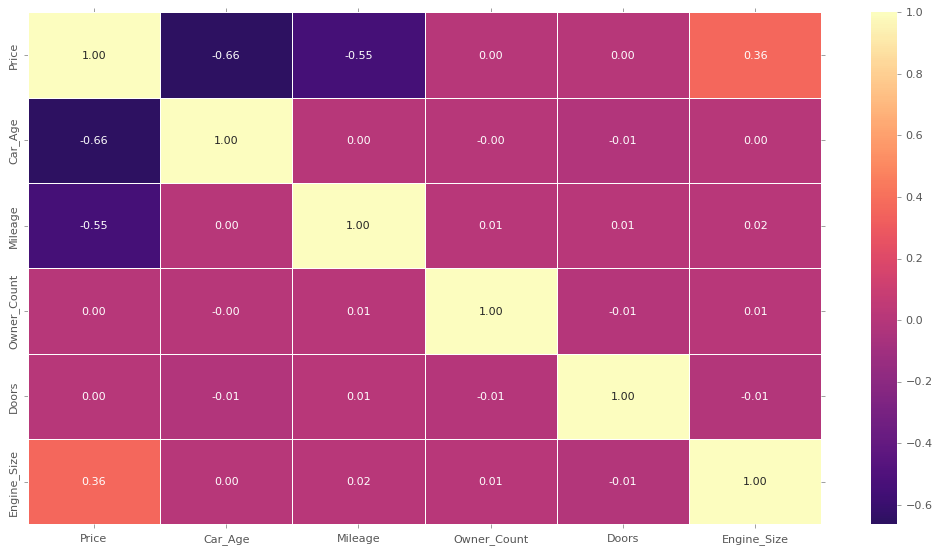

In [308]:
df_matriz = df[['Price', 'Car_Age', 'Mileage', 'Owner_Count', 'Doors', 'Engine_Size']]
matriz = df_matriz.corr()
plt.figure(figsize=(16,8))
sns.heatmap(matriz, annot=True, fmt='.2f', cmap='magma', center=0, linewidths=0.5)
plt.show()

- O gráfico de Barras nos mostra a relação do Preço com as variáveis de Idade do Carro, Quilometragem e Número de Donos, podemos perceber que em relação a Idade o preço diminui conforme a o carro fica mais velho, já a quilometragem começa a baixar o preço do carro na faixa de 50000 Km e o número de Donos não influência em nada. Por último, a Matriz de Correlação nos permite fazer uma análise simultânea da associação entre as variáveis, uma coisa importante aqui é que a idade e a quilometragem são os fatores mais fortemente associados à variação do preço dos veículos, algo que já era esperado.

### Conclusão:

O objetivo desse projeto foi mostrar como podemos extrair informações através de técnicas estatísticas e transformar essas informações em insights através da vizualização de dados.

Agradeço por ter dado uma conferida no meu projeto, se tiver curtido considere dar uma estrela e caso tenha alguma sugestão de melhora ou queira contribuir aqui para me ajudar a melhorar meu aprendizado, fique a vontade.

Se quiser acompanhar mais a minha jornada na área de Data Science e AI, me segue aqui no GitHub e também nas outras plataformas:
- LinkedIn: https://www.linkedin.com/in/matheus-mesquita-a76509341/
- Kaggle: https://www.kaggle.com/mesquitam21